/home/heka/code/retrieval_app


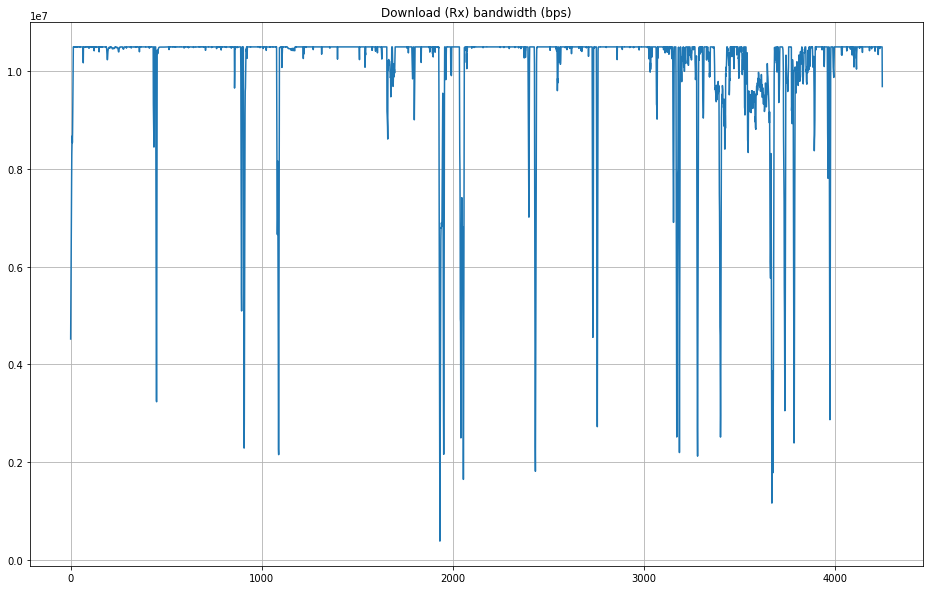

In [1]:
import numpy as np
import sys
import os
import torch
import torch.optim as optim
import pandas as pd
import torch.nn.functional as F
from os.path import join

import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dframe = pd.DataFrame

#%matplotlib notebook
#%matplotlib widget
%matplotlib inline
%load_ext autoreload
%autoreload 2
%cd ..

path_root = '/home/heka/startrinity/'

if 0:
    fname = 'dna_downstairs.csv'
if 0:
    fname = 'dna_downstairs_daytime.csv'
if 0:
    fname = 'dna_downstairs_daytime_2.csv'
if 1:
    fname = 'dna_downstairs_daytime_3.csv'
if 0:
    fname = 'telia_downstairs.csv'
if 0:
    fname = 'dna_upstairs_daytime.csv'
if 0:
    fname = 'dna_upstairs_daytime_2.csv'
if 0:
    fname = 'telia_upstairs_1800Mhz.csv'
if 0:
    fname = 'results.csv'

df = pd.read_csv(join(path_root, fname), index_col='Local time')

i = 0

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.plot(df[df.columns[i]].values)
ax.set_title(df.columns[i])
plt.grid()
plt.show()

In [85]:
df.head()

,Download (Rx) bandwidth (bps),Download bandwidth,Rx packet loss (percent),Upload (Tx) bandwidth (bps),Upload bandwidth,Tx packet loss (percent),RTT (ping) (ms),Rx packet loss burst length (packets),Tx packet loss burst length (packets),Rx instant jitter (ms),Tx instant jitter (ms),Rx RFC3550 jitter (ms),Tx RFC3550 jitter (ms)
Local time,,,,,,,,,,,,,
2020-12-30 15:16:19,7027273.0,6.70Mbps/10.00Mbps,0.0,10019491.0,9.56Mbps/10.00Mbps,0.0,90.0,0.0,0.0,5.1219,45.150600,1.224519,15.078589
2020-12-30 15:16:20,7329100.5,6.99Mbps/10.00Mbps,0.0,10453670.0,9.97Mbps/10.00Mbps,0.0,90.0,0.0,0.0,8.1403,79.871200,2.560040,16.909449
2020-12-30 15:16:21,7658094.5,7.30Mbps/10.00Mbps,0.0,10460212.0,9.98Mbps/10.00Mbps,0.0,112.0,0.0,0.0,7.0171,54.844997,2.012517,15.013978
2020-12-30 15:16:22,7693370.5,7.34Mbps/10.00Mbps,0.0,10467783.0,9.98Mbps/10.00Mbps,0.0,120.0,0.0,0.0,2.3102,44.429398,0.836726,13.721715
2020-12-30 15:16:23,7829511.5,7.47Mbps/10.00Mbps,0.0,10468311.0,9.98Mbps/10.00Mbps,0.0,171.0,0.0,0.0,5.1647,46.160297,1.331931,14.384968


In [76]:
df.columns

Index(['Download (Rx) bandwidth (bps)', 'Download bandwidth',
       'Rx packet loss (percent)', 'Upload (Tx) bandwidth (bps)',
       'Upload bandwidth', 'Tx packet loss (percent)', 'RTT (ping) (ms)',
       'Rx packet loss burst length (packets)',
       'Tx packet loss burst length (packets)', 'Rx instant jitter (ms)',
       'Tx instant jitter (ms)', 'Rx RFC3550 jitter (ms)',
       'Tx RFC3550 jitter (ms)'],
      dtype='object')

**Limit = 10 Mbps:**

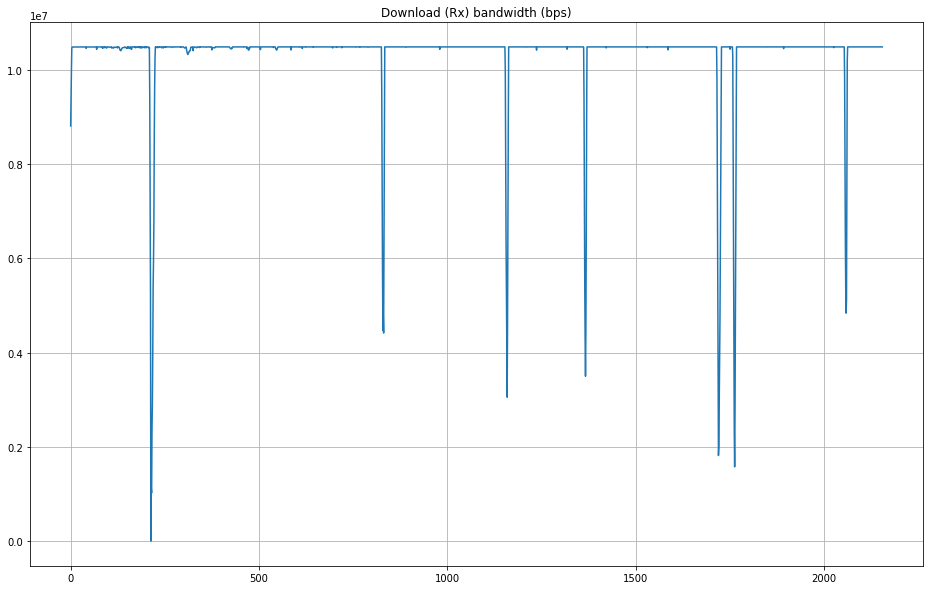

In [77]:
i = 0

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.plot(df[df.columns[i]].values)
ax.set_title(df.columns[i])
plt.grid()
plt.show()

In [59]:
df[df.columns[i]].values

array([6491075. , 7014361. , 5755819.5, ..., 2973095.2, 5138259.5,
       7222029. ])

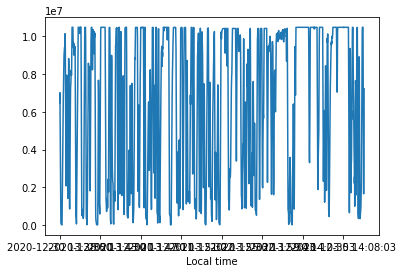

In [56]:
df[df.columns[0]].plot()

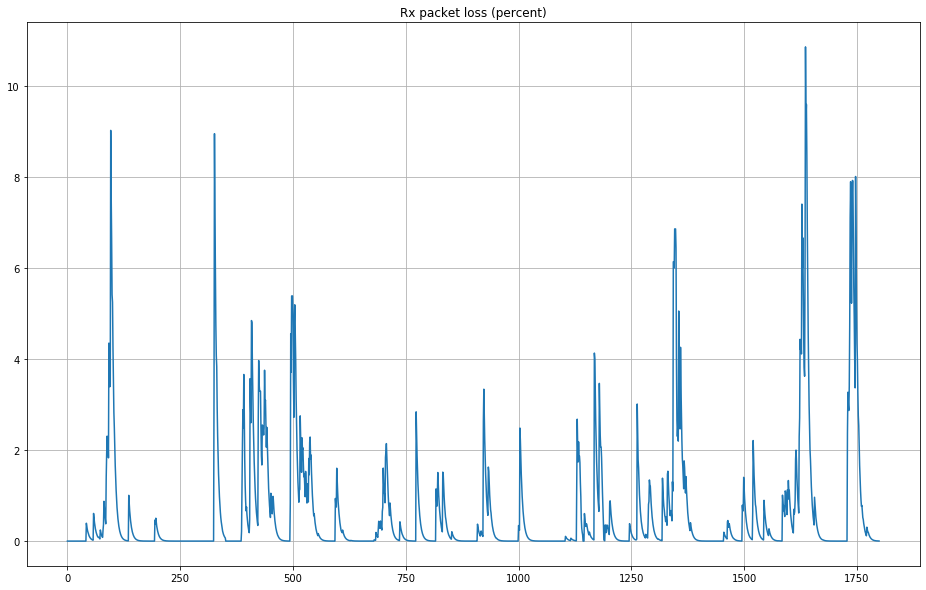

In [30]:
i = 3

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.plot(df[df.columns[i]])
ax.set_title(df.columns[i])
plt.grid()
plt.show()

In [32]:
vals = [[388, 4796],
[274, 2237],
[215, 4159],
[354, 5154],
[312, 5034]]

In [35]:
np.array(vals).sum(0)

array([ 1543, 21380])

In [36]:
21380 / 1543

13.856124432922877

In [37]:
1543 / 21380

0.07217025257249766

In [19]:
x = torch.arange(10)
print(x)

y = x.reshape(-1, 2).flip(1).reshape(-1)
print(y)

x = torch.stack([x, y], dim=1)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([1, 0, 3, 2, 5, 4, 7, 6, 9, 8])
tensor([[0, 1],
        [1, 0],
        [2, 3],
        [3, 2],
        [4, 5],
        [5, 4],
        [6, 7],
        [7, 6],
        [8, 9],
        [9, 8]])


In [34]:
B = 4
D = 2

x = torch.randint(0, 3, (B, D))
print(x)

y = x.reshape(B // 2, 2, D).flip(1).reshape(x.shape)
print(y)

z = torch.cat([x, y], dim=-1)
print(z)

tensor([[1, 2],
        [0, 0],
        [2, 0],
        [1, 2]])
tensor([[0, 0],
        [1, 2],
        [1, 2],
        [2, 0]])
tensor([[1, 2, 0, 0],
        [0, 0, 1, 2],
        [2, 0, 1, 2],
        [1, 2, 2, 0]])


In [36]:
import torch.nn.functional as F

B = 128
C = 64

head1 = torch.randn(B, C)
feat2 = torch.randn(B, C)

loss = F.cosine_similarity(head1, feat2).mean()
print(loss)

tensor(0.0061)


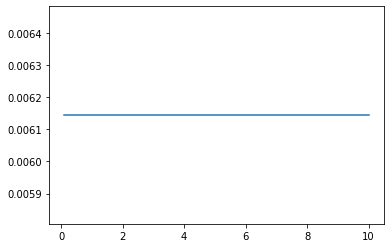

In [38]:
losses = list()
scales = torch.linspace(0.1, 10, 100)
for scale in scales:
    feat3 = scale * feat2
    loss = F.cosine_similarity(head1, feat2).mean()
    losses.append(loss.item())
    
plt.plot(scales.numpy(), losses)
plt.show()

In [42]:
x = torch.randn(1, 16)
print(x)

y = -x
F.cosine_similarity(x, x).mean()

tensor([[-0.5540,  1.6709, -0.5374,  0.5271,  0.5468, -0.5356, -0.7190,  0.8501,
         -0.3830,  0.4315,  0.4476, -0.8371, -0.7177, -0.5471, -2.2715,  0.0323]])


tensor(1.)

In [58]:
from scipy.linalg import expm

def clean_correlation_matrix(mat, level):
    """Cleans the correlation matrix by setting eigenvalues
    lower than the 'level' percentage to a value which
    preserves the trace.
    """
    D, V = np.linalg.eigh(mat)
    D = np.sort(D)
    maxval = np.max(D)
    threshold = maxval * level
    dim = np.shape(mat)[0]
    filtered_eigvals = D[D > threshold]
    min_filtered = np.min(filtered_eigvals)
    filtered_number = dim + 1 - len(filtered_eigvals)
    replacement_eigval = np.sum(D[:filtered_number]) / filtered_number
    D[:filtered_number] = replacement_eigval
    D = np.diag(D)
    cleaned_corrmat = V.dot(D.dot(V.T))
    return cleaned_corrmat

def orthogonal(dim, radius=1., omega=1., seed=None):
    """Sample a random orthogonal matrix.

    :param dim:
    :param radius:
    :param omega:
    :param seed:
    :return:
    """
    np.random.seed(seed) if seed is not None else None
    # A random matrix
    U = 4 * np.random.randn(dim, dim) / np.sqrt(dim)

    # Random skew symmetric matrix:
    A = (U - U.T)

    # Matrix exp:
    Q = expm(omega * A)

    return radius * Q

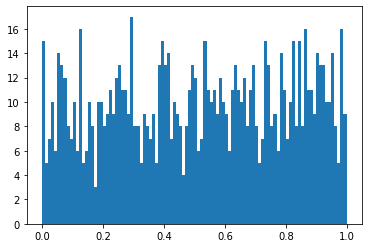

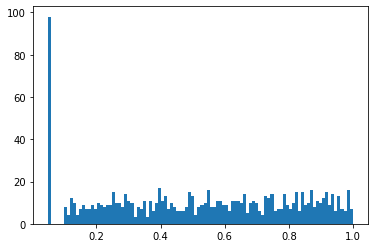

In [61]:
O = orthogonal(1000, radius=1., omega=1.)
D = np.diag(np.random.rand(1000))

C = O.T.dot(D).dot(O)

D, V = np.linalg.eigh(C)
plt.hist(D, bins=100)
plt.show()

C_cleaned = clean_correlation_matrix(C, 0.1)

D, V = np.linalg.eigh(C_cleaned)
plt.hist(D, bins=100)
plt.show()

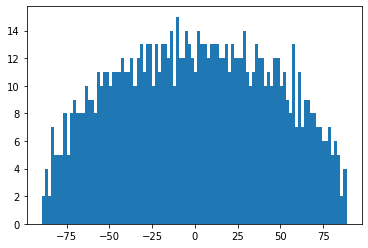

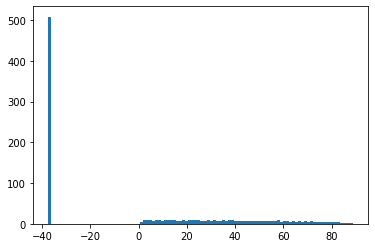

In [54]:
mat = np.random.randn(1000, 1000)
mat = mat + mat.T

D, V = np.linalg.eigh(mat)
plt.hist(D, bins=100)
plt.show()

mat_cleaned = clean_correlation_matrix(mat, 0.01)

D, V = np.linalg.eigh(mat_cleaned)
plt.hist(D, bins=100)
plt.show()

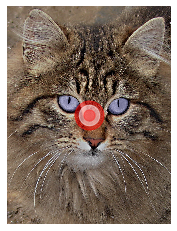

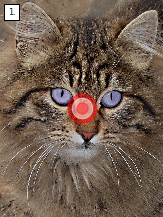

In [125]:
import PIL
from PIL import Image, ImageDraw, ImageFont
from matplotlib.offsetbox import AnchoredText


from core.utils import image_from_url

def fig2pil(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf, transparent=True, pad_inches=0, bbox_inches='tight')
    buf.seek(0)
    img = Image.open(buf).convert('RGB')
    return img

url = 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Cat_07464_kalamis_safinaz.jpg'

img = image_from_url(url)

img = np.array(img)
h, w = img.shape[:-1]
h_center = .5
w_center = .5

fig, ax = plt.subplots()
plt.gca().set_axis_off()
ax.imshow(img)
ax.scatter(w_center * w, h_center * h, s=w, c='r', marker='o', alpha=0.5)
ax.scatter(w_center * w, h_center * h, s=0.5 * w, c='w', marker='o', alpha=0.5)
ax.scatter(w_center * w, h_center * h, s=0.15 * w, c='r', marker='o', alpha=0.4)
plt.show()

#text_dict = dict(boxstyle="square", fc="white")
#ax.annotate('1', (.025 * w, .055 * h), bbox=text_dict)

prop = dict(size=0.02 * w, color='black', alpha=0.9, fontsize=0.02 * w)
at = AnchoredText("1.",
                  prop=prop, frameon=True,
                  loc='upper left',
                  )
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.1")
ax.add_artist(at)

img = fig2pil(fig)

img.save('testfig.jpeg')

img

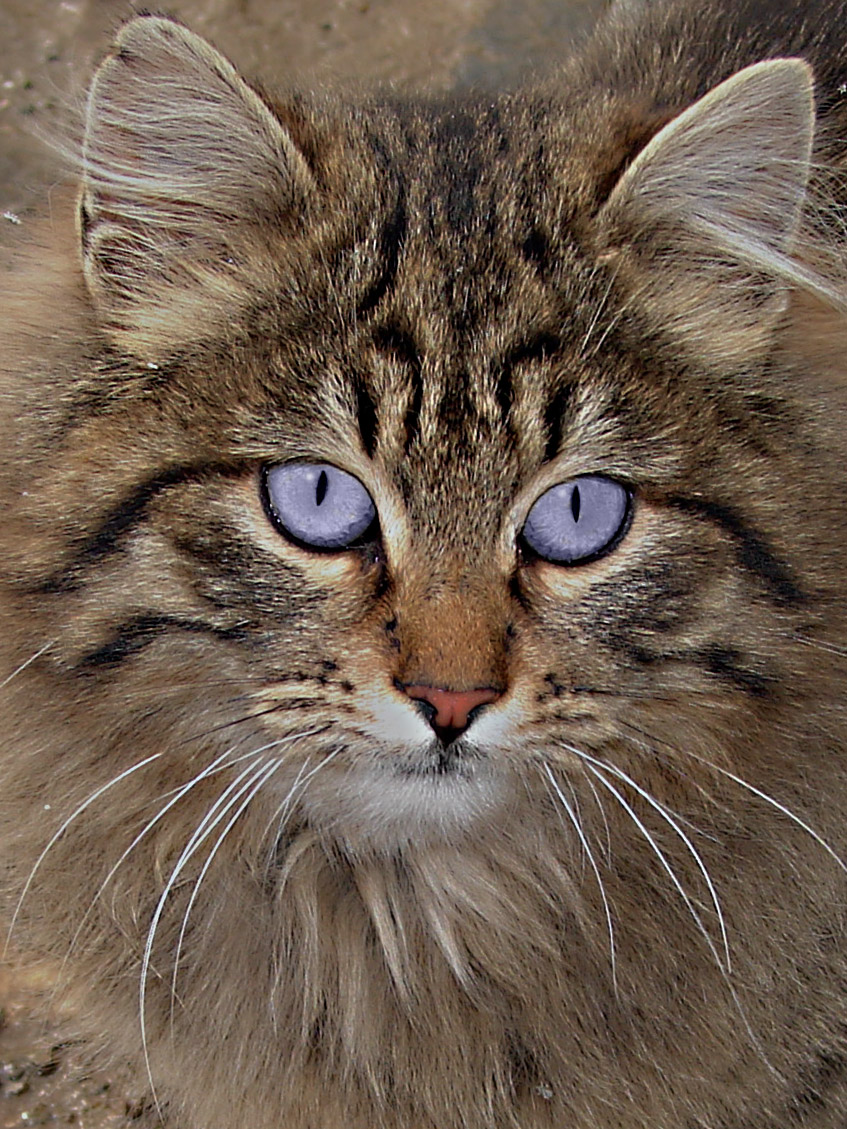

In [67]:
img = image_from_url(url)
img

In [19]:
sim = torch.arange(16).reshape(4, 4)
print(sim)

sim_nodiag = sim[~torch.eye(len(sim), dtype=torch.bool)].reshape(len(sim), -1)
print(sim_nodiag)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
tensor([[ 1,  2,  3],
        [ 4,  6,  7],
        [ 8,  9, 11],
        [12, 13, 14]])


In [7]:
torch.gather(sims, , dim=1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [13]:
sim = np.arange(16).reshape(4, 4)
print(sim)

sim_nodiag = sim[~np.eye(len(sim), dtype=bool)].reshape(len(sim), -1)
print(sim_nodiag)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 1  2  3]
 [ 4  6  7]
 [ 8  9 11]
 [12 13 14]]


In [65]:
%cd /home/heka/code/deephash

from core.losses import drop_diagonal, cosine_sims_fn


B = 3


if 1: # aug sims:
    targets = torch.ones(B) - torch.rand(B) * 0.01
else:  # binary sims
    targets = torch.ones(B)
    
logits = torch.rand(2 * B, 2 * B)

B = len(targets)

# concat interleaved logits for convenience:
logits_l = logits[0::2]
logits_r = logits[1::2]
logits_cat = torch.cat([logits_l, logits_r], dim=0)  # [2*B, C]

# compute cosine sim:
cosine_sims = cosine_sims_fn(logits_cat)  # [2*B, 2*B]

# drop diagonal:
cosine_sims_nodiag = drop_diagonal(cosine_sims)

# create targets:
neg_targets = (1 - targets) / (B - 1)  # note that these are all zero for SimCLR/ binary similarity
print(neg_targets)

target_neg = torch.stack([neg_targets] * B, dim=1)
target_pos = torch.stack([neg_targets] * B, dim=1)
target_pos[torch.arange(B), torch.arange(B)] = targets

target_top = torch.cat([target_neg, target_pos], dim=1)
target_bot = torch.cat([target_pos, target_neg], dim=1)
target_mat = torch.cat([target_top, target_bot], dim=0)
print(target_mat)





/home/heka/code/deephash
tensor([6.2287e-05, 1.8362e-03, 2.9418e-03])
tensor([[6.2287e-05, 6.2287e-05, 6.2287e-05, 9.9988e-01, 6.2287e-05, 6.2287e-05],
        [1.8362e-03, 1.8362e-03, 1.8362e-03, 1.8362e-03, 9.9633e-01, 1.8362e-03],
        [2.9418e-03, 2.9418e-03, 2.9418e-03, 2.9418e-03, 2.9418e-03, 9.9412e-01],
        [9.9988e-01, 6.2287e-05, 6.2287e-05, 6.2287e-05, 6.2287e-05, 6.2287e-05],
        [1.8362e-03, 9.9633e-01, 1.8362e-03, 1.8362e-03, 1.8362e-03, 1.8362e-03],
        [2.9418e-03, 2.9418e-03, 9.9412e-01, 2.9418e-03, 2.9418e-03, 2.9418e-03]])


In [49]:
out[i][j] = input[i][index[i][j]]  # gather
out[i][index[i][j]] = input[i][j]  # scatter

tensor([[0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009],
        [0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021],
        [0.0027, 0.0027, 0.0027, 0.0027, 0.0027, 0.0027],
        [0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009],
        [0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021],
        [0.0027, 0.0027, 0.0027, 0.0027, 0.0027, 0.0027]])

In [60]:
sim = torch.arange(16).reshape(4, 4).float()
print(sim)

sim[torch.arange(4), torch.arange(4)] = torch.rand(4)
print(sim)


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
tensor([[ 0.4022,  1.0000,  2.0000,  3.0000],
        [ 4.0000,  0.4702,  6.0000,  7.0000],
        [ 8.0000,  9.0000,  0.0601, 11.0000],
        [12.0000, 13.0000, 14.0000,  0.1604]])


# 